# Task-2: Machine Learning Model Development

Objective:
Build and compare multiple machine learning models to predict Titanic survival.

Models:
• Logistic Regression
• Decision Tree
• Random Forest

Evaluation:
• Accuracy
• Confusion Matrix
• Feature Importance

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Model saving
import pickle

print("All libraries imported successfully")

All libraries imported successfully


In [2]:
# Load cleaned dataset
df = pd.read_csv("../outputs/processed_data/titanic_cleaned.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)

df.head()

Dataset loaded successfully
Shape: (891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,2,False,True
1,1,1,1,38.0,1,0,71.2833,2,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,2,False,True
4,0,3,0,35.0,0,0,8.0500,1,False,True


In [6]:
# Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
FamilySize      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [7]:
# Handle missing values properly

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Fare with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill Embarked columns if exist
for col in df.columns:
    if "Embarked" in col:
        df[col] = df[col].fillna(df[col].mode()[0])

# Final check
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [8]:
# Define features and target
y = df['Survived']
X = df.drop('Survived', axis=1)

# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Data ready for training")

Data ready for training


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", round(log_acc, 4))

Logistic Regression Accuracy: 0.8101


In [11]:
# Define target
y = df['Survived']

# Define features
X = df.drop('Survived', axis=1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (891, 9)
Target shape: (891,)


In [12]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (712, 9)
Testing samples: (179, 9)


In [13]:
# Logistic Regression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", round(log_acc, 4))

Logistic Regression Accuracy: 0.8101


In [14]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", round(dt_acc, 4))

Decision Tree Accuracy: 0.7877


In [15]:
# Random Forest

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", round(rf_acc, 4))

Random Forest Accuracy: 0.8156


In [16]:
# Compare models

results = pd.DataFrame({

    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],

    "Accuracy": [
        log_acc,
        dt_acc,
        rf_acc
    ]
})

results = results.sort_values(by="Accuracy", ascending=False)

results

,Model,Accuracy
2,Random Forest,0.815642
0,Logistic Regression,0.810056
1,Decision Tree,0.787709


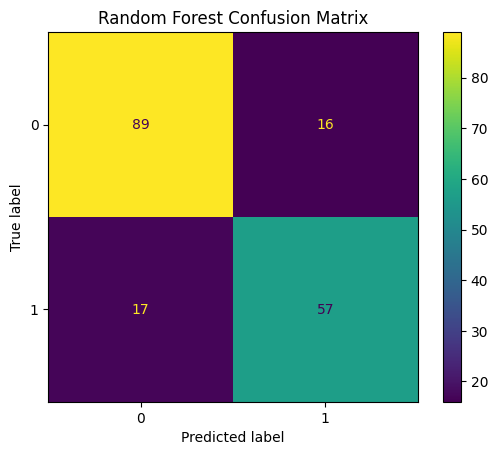

In [17]:
# Confusion Matrix for Random Forest

ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test
)

plt.title("Random Forest Confusion Matrix")

plt.savefig("../outputs/plots/confusion_matrix.png")

plt.show()

In [18]:
# Feature Importance

importance = rf_model.feature_importances_

feature_importance = pd.DataFrame({

    "Feature": X.columns,
    "Importance": importance

})

feature_importance = feature_importance.sort_values(
    by="Importance",
    ascending=False
)

feature_importance

,Feature,Importance
1,Sex,0.280026
5,Fare,0.257631
2,Age,0.242205
0,Pclass,0.082871
6,FamilySize,0.053356
3,SibSp,0.028756
8,Embarked_S,0.022920
4,Parch,0.022347
7,Embarked_Q,0.009887


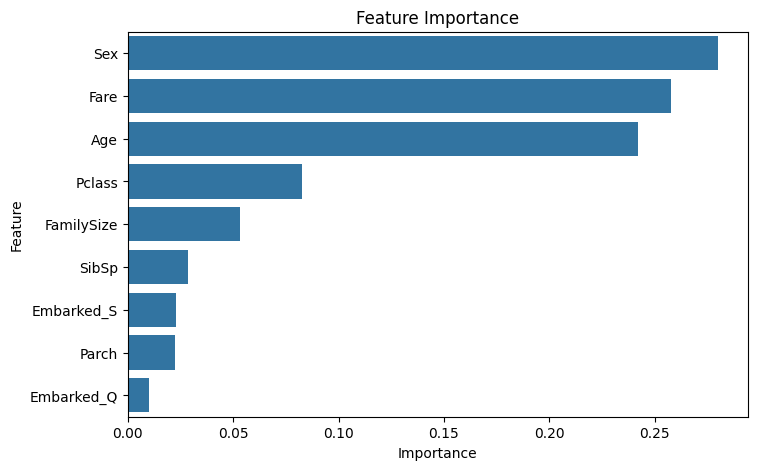

In [19]:
plt.figure(figsize=(8,5))

sns.barplot(

    x="Importance",
    y="Feature",
    data=feature_importance

)

plt.title("Feature Importance")

plt.savefig("../outputs/plots/feature_importance.png")

plt.show()

In [20]:
# Hyperparameter tuning

param_grid = {

    "n_estimators": [50, 100],
    "max_depth": [3, 5, 10]

}

grid = GridSearchCV(

    RandomForestClassifier(random_state=42),

    param_grid,

    cv=5

)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [21]:
best_model = grid.best_estimator_

best_pred = best_model.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)

print("Accuracy after tuning:", round(best_acc, 4))

Accuracy after tuning: 0.8045


In [22]:
# Save model

pickle.dump(

    best_model,

    open("../outputs/processed_data/best_model.pkl", "wb")

)

print("Best model saved successfully")

Best model saved successfully
